<!-- Análise simples de ações da Bolsa de Valores com Python e biblioteca Pandas - VALE3 -->

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importar arquivo CSV
jhsf_df = pd.read_csv('JHSF.csv')

In [3]:
# Criar novo dataframe com as colunas de Data e Fechamento
jhsf_resumo = jhsf_df[['DATA', 'FECHAMENTO']].copy()
jhsf_resumo.columns = ['Data', 'Fechamento']

# Substituir as vírgulas por pontos na coluna de Fechamento
jhsf_resumo ['Fechamento'] = jhsf_resumo ['Fechamento'].str.replace(',' , '.' ).astype(float)

In [4]:
#Exportar o dataframe para um novo arquivo CSV
jhsf_resumo.to_csv('JHSF_RESUMO.csv', index=False)

In [5]:
# 1.Preço medio dos papéis no período
preco_medio = jhsf_resumo['Fechamento'].mean()
print(f'Preço médio das ações: R$ {preco_medio:.2f}')

Preço médio das ações: R$ 4.19


In [6]:
# 2. Preços máximos e minímos
preco_maximo = jhsf_resumo['Fechamento'].max()
data_maximo = jhsf_resumo.loc[jhsf_resumo['Fechamento'].idxmax(),'Data']

preco_minimo = jhsf_resumo['Fechamento'].min()
data_minimo = jhsf_resumo.loc[jhsf_resumo['Fechamento'].idxmin(),'Data']

#Mostrar valores
print(f'Preço máximo de R$ {preco_maximo:.2f} em {data_maximo}')
print(f'Preço minímo de R$ {preco_minimo:.2f} em {data_minimo}')

Preço máximo de R$ 5.25 em 27/12/2023
Preço minímo de R$ 3.63 em 17/06/2024


In [32]:
#3. Valores dos papéis no dia 70 e lucro ou prejuízo no momento
acoes_adquiridas = 2000
data_aquisicao = jhsf_resumo.iloc[9]['Data']
preco_aquisicao = jhsf_resumo.iloc[9]['Fechamento']

data_venda = jhsf_resumo.iloc[69]['Data']
preco_venda = jhsf_resumo.iloc[69]['Fechamento']

valor_investido = acoes_adquiridas * preco_aquisicao 
valor_venda = acoes_adquiridas * preco_venda
lucro = valor_venda - valor_investido

print(f'3. Valor dos papéis no dia 70: R$ {preco_venda:.2f}')
print(f'O investidor teve {"lucro" if lucro > 0 else "prejuízo"} de R$ {abs(lucro):.2f} no dia {data_venda}')

3. Valor dos papéis no dia 70: R$ 4.05
O investidor teve lucro de R$ 220.00 no dia 10/05/2024


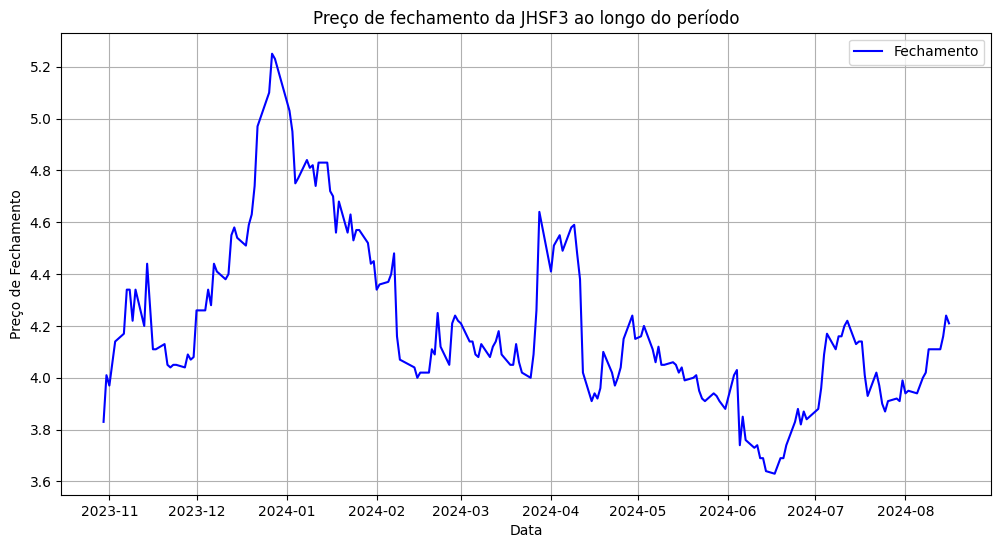

In [33]:
#Gráficos de evolução dos preços (GRÁFICO DE LINHAS)

#converter a coluna Data para formato datetime
jhsf_resumo['Data'] = pd.to_datetime(jhsf_resumo['Data'], format='%d/%m/%Y')

#Criar gráfico
plt.figure(figsize=(12, 6))
plt.plot(jhsf_resumo['Data'], jhsf_resumo['Fechamento'], label= 'Fechamento', color='blue')
plt.title('Preço de fechamento da JHSF3 ao longo do período')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()